## 导入包及数据

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('./data/tmall.csv')

In [3]:
df.head()

,ID,age,job,marital,default,returned,loan,coupon_used_in_last6_month,coupon_used_in_last_month,coupon_ind
0,1,43,management,married,no,yes,no,2,0,0
1,2,42,technician,divorced,no,yes,no,1,1,0
2,3,47,admin.,married,no,yes,yes,2,0,0
3,4,28,management,single,no,yes,yes,2,0,0
4,5,42,technician,divorced,no,yes,no,5,0,0


In [4]:
df.shape

(25317, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25317 entries, 0 to 25316
Data columns (total 10 columns):
ID                            25317 non-null int64
age                           25317 non-null int64
job                           25317 non-null object
marital                       25317 non-null object
default                       25317 non-null object
returned                      25317 non-null object
loan                          25317 non-null object
coupon_used_in_last6_month    25317 non-null int64
coupon_used_in_last_month     25317 non-null int64
coupon_ind                    25317 non-null int64
dtypes: int64(5), object(5)
memory usage: 1.9+ MB


In [6]:
df.describe()

,ID,age,coupon_used_in_last6_month,coupon_used_in_last_month,coupon_ind
count,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000
mean,12659.000000,40.935379,2.772050,0.292847,0.116957
std,7308.532719,10.634289,3.136097,0.765498,0.321375
min,1.000000,18.000000,1.000000,0.000000,0.000000
25%,6330.000000,33.000000,1.000000,0.000000,0.000000
50%,12659.000000,39.000000,2.000000,0.000000,0.000000
75%,18988.000000,48.000000,3.000000,0.000000,0.000000
max,25317.000000,95.000000,55.000000,15.000000,1.000000


In [7]:
sum(df.duplicated())

0

## EDA

### 目标列

In [9]:
#目标列重命名为flag
df = df.rename(columns={'coupon_ind':'flag'})

In [11]:
df['flag'].value_counts(1)

0    0.883043
1    0.116957
Name: flag, dtype: float64

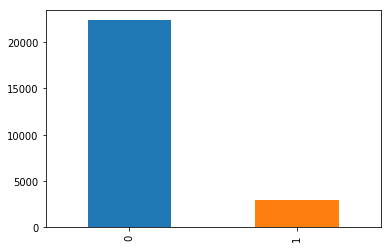

In [12]:
df['flag'].value_counts().plot(kind='bar');

未使用优惠券的样本占到了88.3%

### age

In [13]:
df['age'].describe()

count    25317.000000
mean        40.935379
std         10.634289
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

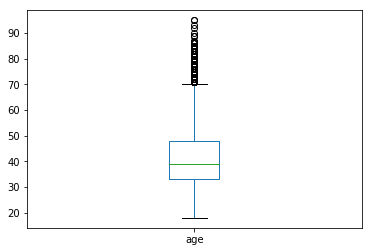

In [14]:
df['age'].plot(kind='box')

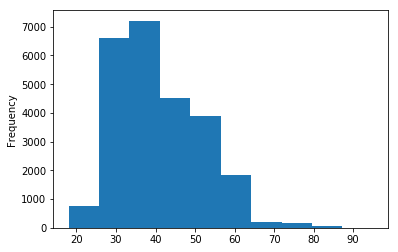

In [15]:
df['age'].plot(kind='hist');

age中可能存在离群值。

- 与目标列的关系

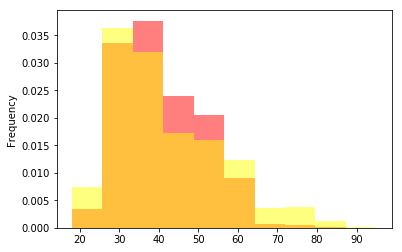

In [22]:
df[df['flag']==0]['age'].plot(kind='hist',density=True,color='red',alpha=0.5)
df[df['flag']==1]['age'].plot(kind='hist',density=True,color='yellow',alpha=0.5);

In [ ]:
df[df['coupon_ind']==0]['age']

- <35 & > 55的用户 更偏向于使用优惠券；
- xxx

### job

In [24]:
df['job'].value_counts(1)

blue-collar      0.215507
management       0.209188
technician       0.167516
admin.           0.114903
services         0.092507
retired          0.050282
self-employed    0.034917
entrepreneur     0.033811
unemployed       0.027689
housemaid        0.026188
student          0.021053
unknown          0.006438
Name: job, dtype: float64

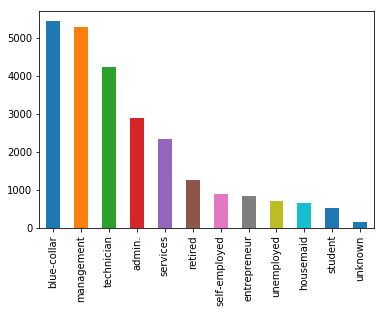

In [25]:
df['job'].value_counts().plot(kind='bar');

- 与目标列关系

In [32]:
tmp = pd.DataFrame(df.groupby('job')['flag'].value_counts(1))
tmp = tmp.rename(columns={'flag':'rate'})
tmp = tmp.reset_index()

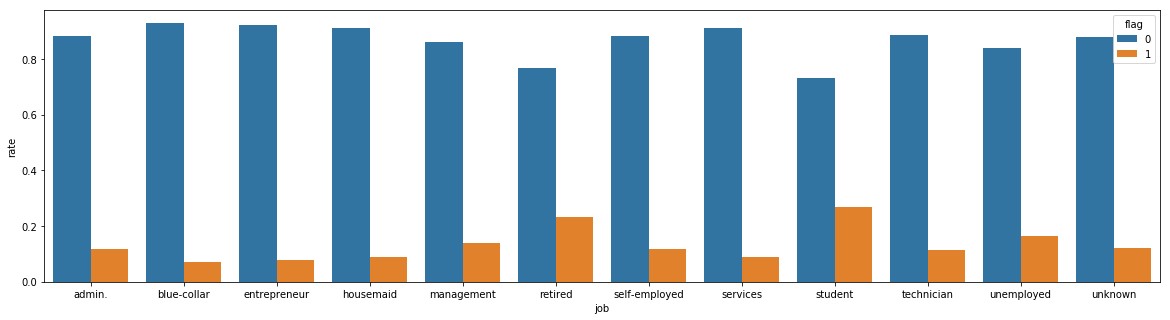

In [35]:
plt.figure(figsize=(20,5))
sns.barplot(x='job',y='rate',hue='flag',data=tmp)

- retired & student 更偏向于使用优惠券

- 可以尝试进行类别合并。

不能只看数量，更应该看比例

### marital

In [ ]:
df['marital'].value_counts().plot(kind='bar');

In [ ]:
df.groupby('marital')['coupon_ind'].apply(lambda x:x.value_counts()/x.count()).plot(kind='barh');

### default

In [ ]:
df.groupby('default')['coupon_ind'].apply(lambda x:x.value_counts()/x.count()).plot(kind='barh');

### returned

In [ ]:
df.groupby('returned')['coupon_ind'].apply(lambda x:x.value_counts()/x.count()).plot(kind='barh');

### loan

In [ ]:
df.groupby('loan')['coupon_ind'].apply(lambda x:x.value_counts()/x.count()).plot(kind='barh');

### coupon_used_in_last6_month

In [ ]:
df[df['coupon_ind']==0]['coupon_used_in_last6_month'].plot(kind='hist',bins=20,density=True,alpha=0.5);
df[df['coupon_ind']==1]['coupon_used_in_last6_month'].plot(kind='hist',bins=20,density=True,alpha=0.5);

### coupon_used_in_last_month

## 特征处理

In [36]:
#将ID转为index  -> 1.ID不能作为特征，会产生干扰；2.将ID设为index之后，方便后面根据ID将特征与结果一一对应
df_clean = df.set_index('ID')
# df.drop('ID',axis=1)

In [37]:
#将分类变量转为哑变量
df_clean = pd.get_dummies(df_clean,drop_first=True)

In [38]:
df_clean.head()

,age,coupon_used_in_last6_month,coupon_used_in_last_month,flag,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,default_yes,returned_yes,loan_yes
ID,,,,,,,,,,,,,,,,,,,,
1,43,2,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
2,42,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,47,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
4,28,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1
5,42,5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


## 建模

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [40]:
X = df_clean.drop('flag',axis=1)
y = df_clean['flag']

### 【拓展】stratify

In [41]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [42]:
#比较效果
y.mean() - y_train.mean()

0.0012185959434071192

In [43]:
#比较效果
y_test.mean() - y_train.mean()

0.0040615052000050195

In [44]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y)#stratify=y 可以按照y的比例去拆分数据

In [45]:
#比较效果
y.mean() - y_train.mean()

-2.286898520864611e-05

In [46]:
#比较效果
y_test.mean() - y_train.mean()

-7.622091871078984e-05

- 建模

In [47]:
lr_normal = LogisticRegression(random_state=7)
lr_normal.fit(x_train,y_train)

C:\Users\Administrator\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=7, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [48]:
y_pred = lr_normal.predict(x_test)

In [49]:
accuracy_score(y_test,y_pred)

0.8827014218009479

注意：这里有一个问题！

In [50]:
y.value_counts(1)

0    0.883043
1    0.116957
Name: flag, dtype: float64

### 【拓展了解】数据不平衡问题

<table><tr>
<td><img src="https://www.svds.com/wp-content/uploads/2016/08/clean.png" width='400px' border=0></td>
<td><img src="https://www.svds.com/wp-content/uploads/2016/08/messy.png" width='400px' border=0></td>
</tr></table> 

不平衡数据，顾名思义，就是指在收集到的数据中各个分类之比并非为1:1，普遍认为不平衡意味着少数类所占比例在10%到20%之间， 但实际上，这种现象可能会更严重，比如说： 

- 每年有大约2%的信用卡用户存在欺诈；
- 某种情况的医学筛查，比如说美国的艾滋病得病率约为0.4%；
- 磁盘驱动器的故障率每年约1%；
- 在线广告的转化率约在10-3至10-6之间；

In [51]:
#我们可以使用混淆矩阵，来查看刚才的预测效果
confusion_matrix(y_test,y_pred)

array([[6701,    7],
       [ 884,    4]], dtype=int64)

In [52]:
#这部分代码不用管
def confusion_matrix_plot(y_test,y_pred):
    data = confusion_matrix(y_test,y_pred)
    sns.heatmap(data,annot=True,annot_kws={'size':20,'weight':'bold'},cbar=False,fmt='.20g')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix')

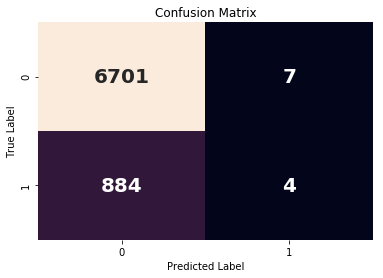

In [53]:
confusion_matrix_plot(y_test,y_pred)

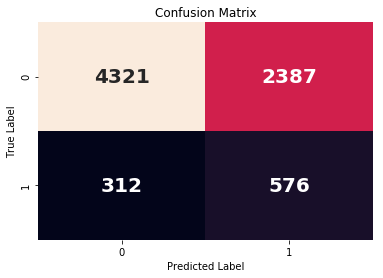

In [56]:
confusion_matrix_plot(y_test,y_balanced_pred)

## 优化

### 解决不平衡数据的问题

In [54]:
lr_balanced = LogisticRegression(random_state=7,class_weight='balanced')
lr_balanced.fit(x_train,y_train)

C:\Users\Administrator\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=7,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [55]:
y_balanced_pred = lr_balanced.predict(x_test)

### 将年龄分箱
### 将年龄中的离群值删除
### 将coupon_used_in这两列，作为分类变量处理
### 将job列中，分布类似的类别合并
。。。